In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Завдання 1.

Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії за
посиланням
https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)

In [185]:
#1. Вивести перших 5 рядків.

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [186]:
#2. Визначити розмір датасета.

df.shape

(210, 7)

In [187]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [188]:
#4. Змінити назви стовпців на більш зручні
current_columns = [
            ( 'Country/Territory','Country/Territory'),
            (        'IMF[1][13]','Forecast'),
            (        'IMF[1][13]','Year'),
            (    'World Bank[14]','Estimate'),
            (    'World Bank[14]','Year'),
            ('United Nations[15]','Estimate'),
            ('United Nations[15]','Year')
            ]

new_columns = [
    'Country',
    'IMF/Forecast',
    'IMF/2024',
    'World Bank/Estimate',
    'World Bank/2023',
    'United Nations/Estimate',
    'United Nations/2022'
]
df.columns = new_columns
df.head()

,Country,IMF/Forecast,IMF/2024,World Bank/Estimate,World Bank/2023,United Nations/Estimate,United Nations/2022
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


In [189]:
df.columns

Index(['Country', 'IMF/Forecast', 'IMF/2024', 'World Bank/Estimate',
       'World Bank/2023', 'United Nations/Estimate', 'United Nations/2022'],
      dtype='object')

In [190]:
#3. Визначити оптимальну кількість стовпців.

selected_columns = {
    'IMF/Forecast': 'IMF/2024',
    'World Bank/Estimate': 'World Bank/2023',
    'United Nations/Estimate': 'United Nations/2022'
}

df1 = df[['Country'] + list(selected_columns.keys())]
df = df1.rename(columns=selected_columns)
df.head()

,Country,IMF/2024,World Bank/2023,United Nations/2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


In [191]:
#5. Визначити тип даних.

df.dtypes

,0
Country,object
IMF/2024,object
World Bank/2023,object
United Nations/2022,object


In [192]:
df['IMF/2024'] = pd.to_numeric(df['IMF/2024'], errors='coerce')
df['World Bank/2023'] = pd.to_numeric(df['World Bank/2023'], errors='coerce')
df['United Nations/2022'] = pd.to_numeric(df['United Nations/2022'], errors='coerce')

In [193]:
df.dtypes

,0
Country,object
IMF/2024,float64
World Bank/2023,float64
United Nations/2022,float64


In [194]:
#6. Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.
df.replace('—', float('NaN'), inplace=True)
df.isnull().sum()

,0
Country,0
IMF/2024,15
World Bank/2023,8
United Nations/2022,1


In [195]:
df.head(23)

,Country,IMF/2024,World Bank/2023,United Nations/2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0
6,United Kingdom,3495261.0,3340032.0,3089072.0
7,France,3130014.0,3030904.0,2775316.0
8,Brazil,2331391.0,2173666.0,1920095.0
9,Italy,2328028.0,2254851.0,2046952.0


In [196]:
#6 Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.
df.replace({'—', np.NaN})
df = df.fillna(df.mean(numeric_only=True), axis=0)


<ipython-input-196-b558db3e01e6>:2: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df.replace({'—', np.NaN})


In [155]:
df.head(23)

,Country,IMF/2024,World Bank/2023,United Nations/2022
0,World,109529216.0,1.054355e+08,1.008348e+08
1,United States,28781083.0,2.736094e+07,2.574410e+07
2,China,18532633.0,1.779478e+07,1.796317e+07
3,Germany,4591100.0,4.456081e+06,4.076923e+06
4,Japan,4110452.0,4.212945e+06,4.232173e+06
5,India,3937011.0,3.549919e+06,3.465541e+06
6,United Kingdom,3495261.0,3.340032e+06,3.089072e+06
7,France,3130014.0,3.030904e+06,2.775316e+06
8,Brazil,2331391.0,2.173666e+06,1.920095e+06
9,Italy,2328028.0,2.254851e+06,2.046952e+06


In [197]:
#7. Ще раз перевірити наявність пропущених значень.

df.isnull().sum()

,0
Country,0
IMF/2024,0
World Bank/2023,0
United Nations/2022,0


In [198]:
#8. Перевірити наявність дублікатів. При наявності видалити дублікати.

df.duplicated().sum()

0

In [199]:
#9. Вивести описову статистику датасету describe()

df.describe()

,IMF/2024,World Bank/2023,United Nations/2022
count,2.100000e+02,2.100000e+02,2.100000e+02
mean,1.123228e+06,1.037206e+06,9.612699e+05
std,7.900707e+06,7.602076e+06,7.275608e+06
min,6.600000e+01,6.200000e+01,5.900000e+01
25%,1.464775e+04,1.044175e+04,8.928250e+03
50%,6.215800e+04,4.341600e+04,3.210250e+04
75%,4.366365e+05,3.376592e+05,2.412485e+05
max,1.095292e+08,1.054355e+08,1.008348e+08


In [200]:
df = df.drop(index=0)
df.head()

,Country,IMF/2024,World Bank/2023,United Nations/2022
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0


In [201]:
#10.Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни. У яких країнах ці показники найбільше відрізняються (дати відповідт)?

df['Difference'] = df['IMF/2024'] - df['World Bank/2023']
max_difference = df['Difference'].abs().max()
print(df)


              Country    IMF/2024  World Bank/2023  United Nations/2022  \
1       United States  28781083.0       27360935.0           25744100.0   
2               China  18532633.0       17794782.0           17963170.0   
3             Germany   4591100.0        4456081.0            4076923.0   
4               Japan   4110452.0        4212945.0            4232173.0   
5               India   3937011.0        3549919.0            3465541.0   
..                ...         ...              ...                  ...   
205          Kiribati       311.0            279.0                223.0   
206             Palau       308.0            263.0                225.0   
207  Marshall Islands       305.0            284.0                279.0   
208             Nauru       161.0            154.0                147.0   
209            Tuvalu        66.0             62.0                 59.0   

     Difference  
1     1420148.0  
2      737851.0  
3      135019.0  
4     -102493.0  
5      38

Найбільша різниця в United States = 1420148.0

In [202]:
# 11.Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022. Які пари змінних мають найвищу кореляцію?

correlation_matrix = df[['IMF/2024', 'World Bank/2023', 'United Nations/2022']].corr()
print(correlation_matrix)
max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1]
highest_corr_pair = max_corr.idxmax()
highest_corr_value = max_corr.max()
print("\nПара змінних з найвищою кореляцією:")
print(f"{highest_corr_pair} з кореляцією {highest_corr_value:.2f}")

                     IMF/2024  World Bank/2023  United Nations/2022
IMF/2024             1.000000         0.993137             0.992032
World Bank/2023      0.993137         1.000000             0.996336
United Nations/2022  0.992032         0.996336             1.000000

Пара змінних з найвищою кореляцією:
('World Bank/2023', 'United Nations/2022') з кореляцією 1.00


Пара змінних з найвищою кореляцією
World Bank/2023', 'United Nations/2022 з кореляцією 1.00

In [203]:
#12.Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?

mean_values = df[['IMF/2024', 'World Bank/2023', 'United Nations/2022']].mean()
print("Середнє значення для кожного стовпця:")
print(mean_values)


Середнє значення для кожного стовпця:
IMF/2024               604538.747884
World Bank/2023        537692.609314
United Nations/2022    483406.095007
dtype: float64


Середнє значення зростає

In [204]:
#13.Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?

df['Standard Deviation'] = df[['IMF/2024', 'World Bank/2023', 'United Nations/2022']].std(axis=1)

# 2. Знаходження країни з найвищою варіативністю
max_variability_country = df.loc[df['Standard Deviation'].idxmax(), 'Country']
max_variability_value = df['Standard Deviation'].max()
print("Стандартне відхилення показників для кожної країни:")
print(df[['Country', 'Standard Deviation']])
print(f"\nКраїна з найвищою варіативністю у показниках: {max_variability_country} з відхиленням {max_variability_value:.2f}")

Стандартне відхилення показників для кожної країни:
              Country  Standard Deviation
1       United States        1.519553e+06
2               China        3.866667e+05
3             Germany        2.665736e+05
4               Japan        6.543512e+04
5               India        2.514106e+05
..                ...                 ...
205          Kiribati        4.454211e+01
206             Palau        4.154917e+01
207  Marshall Islands        1.379613e+01
208             Nauru        7.000000e+00
209            Tuvalu        3.511885e+00

[209 rows x 2 columns]

Країна з найвищою варіативністю у показниках: United States з відхиленням 1519552.65


Країна з найвищою варіативністю у показниках: United States з відхиленням 1519552.65

In [206]:
#14.Визначення країни з найвищим та найнижчим показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років(MVF_2024, WorldBank_2023, OON_2022).

highest_imf = df.loc[df['IMF/2024'].idxmax()]
highest_wb = df.loc[df['World Bank/2023'].idxmax()]
highest_un = df.loc[df['United Nations/2022'].idxmax()]
lowest_imf = df.loc[df['IMF/2024'].idxmin()]
lowest_wb = df.loc[df['World Bank/2023'].idxmin()]
lowest_un = df.loc[df['United Nations/2022'].idxmin()]
print("Країни з найвищими показниками:")
print(f"IMF/2024: {highest_imf['Country']} з показником {highest_imf['IMF/2024']}")
print(f"World Bank/2023: {highest_wb['Country']} з показником {highest_wb['World Bank/2023']}")
print(f"United Nations/2022: {highest_un['Country']} з показником {highest_un['United Nations/2022']}")
print("\nКраїни з найнижчими показниками:")
print(f"IMF/2024: {lowest_imf['Country']} з показником {lowest_imf['IMF/2024']}")
print(f"World Bank/2023: {lowest_wb['Country']} з показником {lowest_wb['World Bank/2023']}")
print(f"United Nations/2022: {lowest_un['Country']} з показником {lowest_un['United Nations/2022']}")

Країни з найвищими показниками:
IMF/2024: United States з показником 28781083.0
World Bank/2023: United States з показником 27360935.0
United Nations/2022: United States з показником 25744100.0

Країни з найнижчими показниками:
IMF/2024: Tuvalu з показником 66.0
World Bank/2023: Tuvalu з показником 62.0
United Nations/2022: Tuvalu з показником 59.0


Країни з найвищими показниками: United States
Країни з найнижчими показниками: Tuvalu

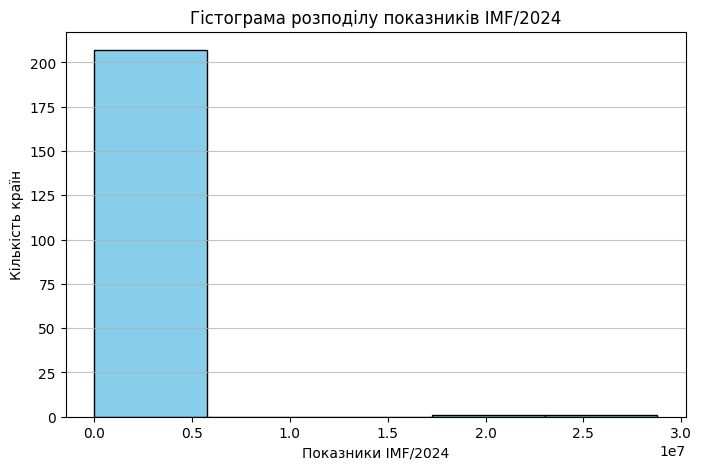

In [209]:
#15.Побудуйте гістограму для розподілу показників MVF_2024 серед всіх країн. Який вигляд має розподіл? Чи є країни, що виділяються?

plt.figure(figsize=(8, 5))
plt.hist(df['IMF/2024'], bins=5, color='skyblue', edgecolor='black')
plt.title('Гістограма розподілу показників IMF/2024')
plt.xlabel('Показники IMF/2024')
plt.ylabel('Кількість країн')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [211]:
#16.Розрахуйте частку кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки країн з часом (дати відповідь)?

total_imf = df['IMF/2024'].sum()
total_wb = df['World Bank/2023'].sum()
total_un = df['United Nations/2022'].sum()
df['IMF/2024 Share'] = df['IMF/2024'] / total_imf
df['World Bank/2023 Share'] = df['World Bank/2023'] / total_wb
df['United Nations/2022 Share'] = df['United Nations/2022'] / total_un
print("\nЗміни часток країн з часом:")
print(df[['Country', 'IMF/2024 Share', 'World Bank/2023 Share', 'United Nations/2022 Share']].set_index('Country').T)


Зміни часток країн з часом:
Country                    United States     China   Germany     Japan  \
IMF/2024 Share                  0.227791  0.146679  0.036337  0.032533   
World Bank/2023 Share           0.243473  0.158348  0.039653  0.037489   
United Nations/2022 Share       0.254812  0.177797  0.040353  0.041889   

Country                       India  United Kingdom    France    Brazil  \
IMF/2024 Share             0.031160        0.027664  0.024773  0.018452   
World Bank/2023 Share      0.031589        0.029721  0.026971  0.019342   
United Nations/2022 Share  0.034301        0.030575  0.027470  0.019005   

Country                       Italy    Canada  ...     Samoa  \
IMF/2024 Share             0.018425  0.017746  ...  0.000008   
World Bank/2023 Share      0.020065  0.019044  ...  0.000008   
United Nations/2022 Share  0.020260  0.021161  ...  0.000008   

Country                    São Tomé and Príncipe  Dominica     Tonga  \
IMF/2024 Share                          0.00

Частки країн з часом зменшуються

In [218]:
df = df.drop(columns=['IMF/2024 Share'])
df = df.drop(columns=['World Bank/2023 Share'])
df = df.drop(columns=['United Nations/2022 Share'])
df = df.drop(columns=['Standard Deviation'])
df = df.drop(columns=['Difference'])

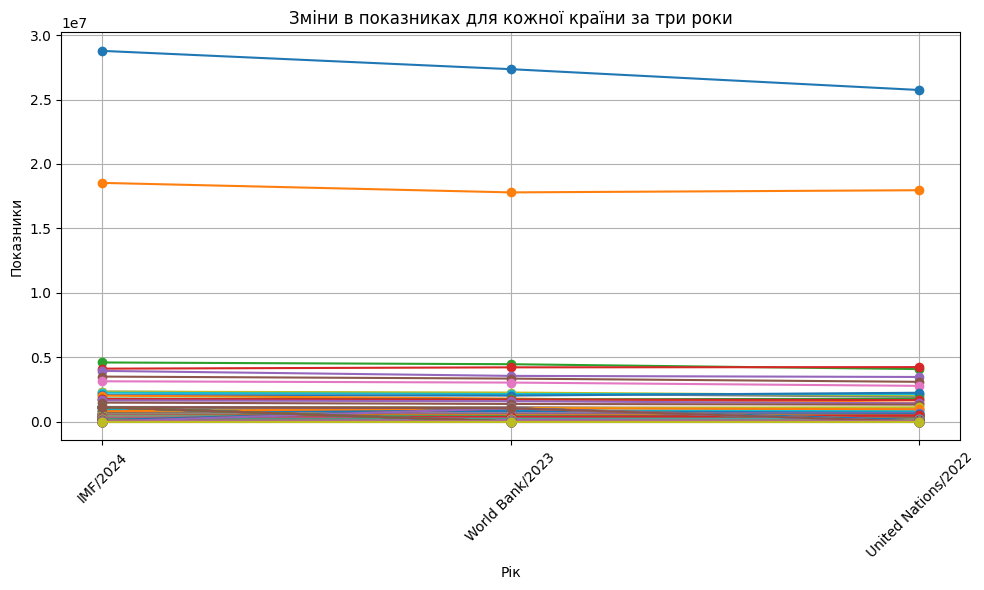

In [219]:
#17.Візуалізуйте зміни в показниках для кожної країни за три роки на графіку. Які країни показують стабільне зростання або спад (дати відповідь)?

df_melted = df.melt(id_vars='Country', var_name='Year', value_name='Value')
plt.figure(figsize=(10, 6))
for country in df['Country']:
    plt.plot(df_melted[df_melted['Country'] == country]['Year'],
             df_melted[df_melted['Country'] == country]['Value'],
             marker='o', label=country)

plt.title('Зміни в показниках для кожної країни за три роки')
plt.xlabel('Рік')
plt.ylabel('Показники')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Висновок. Провели попередній аніліз даних. Визначили відхилення між показниками IMF/2024 та World Bank/2023, найбільше відхилення становить 1420148.0(United States). Обчислили кореляцію між показниками IMF/2024, World Bank/2023 та United Nations/2022. Обчислили середнє значення для кожного стовпця:IMF/2024 = 604538.747884, World Bank/2023 = 537692.609314, United Nations/2022 = 483406.095007.